Version 2: incorporated merchant credit quality in the decision trees

In [1]:
import pandas as pd
import numpy as np

## Preparation of DataFrame
Data in Data Foler for this specific analysis

### saving of Base Data

In [2]:
#Saving of Base data for this analysis
# raw_df = pd.read_csv(r"C:\Users\emanlangit\Documents\2025\03_ASBKH\03 Merchant Analysis\00_master_data_extract_for_merchant_analysis_withagreementcd_orig.csv")
# raw_df['appdate'] = raw_df['appdate'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors = 'coerce'))

# addtl_df = pd.read_csv(r"C:\Users\emanlangit\Documents\2025\03_ASBKH\03 Merchant Analysis\merged_df_v3_cleaned.csv")
# addtl_col_df = addtl_df[['appcd','branchcode','position']]
# merged_df = pd.merge(raw_df,addtl_col_df, how='inner', on = 'appcd')
# merged_df.to_csv("Base_Data_05132025.csv", index=False)

### Load Base Data
Adjust datetime columns, add target column, add interval

In [2]:
base_df = pd.read_csv(r"C:\Users\emanlangit\Documents\2025\03_ASBKH\03 Merchant Analysis\02 ASBC Analysis 05132025\Data\Base_Data_05132025.csv")
df = base_df.copy()

C:\Users\emanlangit\AppData\Local\Temp\ipykernel_8108\3118858516.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  base_df = pd.read_csv(r"C:\Users\emanlangit\Documents\2025\03_ASBKH\03 Merchant Analysis\02 ASBC Analysis 05132025\Data\Base_Data_05132025.csv")


In [3]:
df.shape

(444001, 31)

In [4]:
df['appdate'] = df['appdate'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors = 'coerce'))
df['agreementdate'] = df['agreementdate'].apply(lambda x: pd.to_datetime(x, format='%Y/%m/%d', errors = 'coerce'))

In [5]:
df['D3_within8m'] = df['agreementdate_months_elapsed_valid'].apply(lambda x: 1 if 3 <= x <= 8 else 0)

# Function to add tags
def add_tags(date):
    if date >= pd.Timestamp('2023-01-01') and date <= pd.Timestamp('2023-07-31'):
        return 'Interval_1'
    elif date >= pd.Timestamp('2024-01-01') and date <= pd.Timestamp('2024-07-31'):
        return 'Interval_2'
    else:
        return 'Other'

# Apply the function to the Date column
df['Interval_Tag'] = df['agreementdate'].apply(add_tags)

In [6]:
#reset_df = df.copy(deep=True)
back_up = reset_df.copy(deep=True)

### Incorporate storecd and credit quality ratio

In [7]:
merchant_cred_qual_df = pd.read_csv(r"C:\Users\emanlangit\Documents\2025\03_ASBKH\03 Merchant Analysis\02 ASBC Analysis 05132025\Notebooks\MHP_2023_overall_credit_quality.csv")

In [8]:
merchant_cred_qual_df['credit_quality_ratio'] = merchant_cred_qual_df.credit_quality_ratio.fillna(-999)

In [9]:
merchant_cred_qual_df['credit_quality_ratio'].isnull().sum()

0

In [10]:
merged_df = pd.merge(df, merchant_cred_qual_df, on ='storecd', how='inner')

In [11]:
merged_df.storecd.nunique()

6957

In [12]:
merged_df[merged_df.storecd == '02-01-02896-01-18-01'].Risk_Grade.value_counts()

Risk_Grade
Very High Risk    1341
High Risk          495
Low Risk           416
Middle Risk        268
Name: count, dtype: int64

In [13]:
print(merchant_cred_qual_df.shape)
print(df.shape)

(6957, 2)
(444001, 33)


In [14]:
df = merged_df.copy()

# ignore

In [10]:
# df['branchcode'] = 'Branch' + '_' + df['branchcode']

In [11]:
# #companytype ok
# df['companytype_grp'] = np.where(
#     (df['companytype'] != 'FACTORY') & (df['companytype'] != 'PRIVATE COMPANY (LESS 50 STAFFS)')
#     & (df['companytype'] != 'PRIVATE COMPANY (50 STAFFS UP)') & (df['companytype'] != 'SELF-EMPLOYMENT'),
#     'OTHERS', df['companytype'])

In [11]:
# #financeprice ok
# def financeprice_bin(x):
#     try:
#         y = float(x)
#         bins = [
#             (3000, '3000 above'),
#             (2700, '2701-3000'),
#             (2400, '2401-2700'),
#             (2100, '2101-2400'),
#             (1800, '1801-2100'),
#             (1500, '1501-1800'),
#             (-1, '1500 below')
#         ]
        
#         for threshold, label in bins:
#             if y > threshold:
#                 return label
#     except ValueError:
#         return x

# df.loc[:, 'financeprice_grp'] = df['financeprice_USD'].apply(financeprice_bin)

In [12]:
# #salary ok
# def salary_bin(x):
#     try:
#         y = float(x)
#         bins = [
#             (600, '600 above'),
#             (500, '501-600'),
#             (400, '401-500'),
#             (300, '301-400'),
#             (-1, '300 below')
#         ]
        
#         for threshold, label in bins:
#             if y > threshold:
#                 return label
#     except ValueError:
#         return x

# df.loc[:, 'salary_grp'] = df['salary'].apply(salary_bin)

In [13]:
# #livingperiod ok
# def livingperiod_bin(x):
#     try:
#         y = float(x)
#         bins = [
#             (7, 'Long_term_livingperiod'),
#             (1, 'Moderate_term_livingperiod'),
#             (-1, 'Short_term_livingperiod')
#         ]
        
#         for threshold, label in bins:
#             if y > threshold:
#                 return label
#     except ValueError:
#         return x

# df.loc[:, 'livingperiod_grp'] = df['livingperiod_valid'].apply(livingperiod_bin)

In [93]:
# #workingperiod ok
# def workingperiod_bin(x):
#     try:
#         y = float(x)
#         bins = [
#             (5, 'Long_term_workingperiod'),
#             (1, 'Moderate_term_workingperiod'),
#             (-1, 'Short_term_workingperiod')
#         ]
        
#         for threshold, label in bins:
#             if y > threshold:
#                 return label
#     except ValueError:
#         return x

# df.loc[:, 'workingperiod_grp'] = df['workingperiod_valid'].apply(workingperiod_bin)

In [15]:
# #age 
# def age_bin(x):
#     try:
#         y = float(x)
#         bins = [
#             (40, '40 above'),
#             (35, '36 to 40'),
#             (30, '31 to 35'),
#             (25, '26 to 30'),
#             (20, '21 to 25'),
#             (-1, '21 below')
#         ]
        
#         for threshold, label in bins:
#             if y > threshold:
#                 return label
#     except ValueError:
#         return x

# df.loc[:, 'age_grp'] = df['age_valid'].apply(age_bin)

In [13]:
# df['branchcode_x_salaryrange'] = df['branchcode'] + '_salaryrange_' + df['salary_grp']
# df['branchcode_x_workingperiod_grp'] = df['branchcode'] + '_workingperiod_' + df['workingperiod_grp']
# df['branchcode_x_livingperiod_grp'] = df['branchcode'] + '_livingperiod_' + df['livingperiod_grp']
# df['branchcode_x_age_range'] = df['branchcode'] + '_agerange_' + df['age_grp']
# df['branchcode_x_companytype_grp'] = df['branchcode'] + 'companytype' + df['companytype_grp']
# df['branchcode_x_financeprice_range'] = df['branchcode'] + 'financepricerange' + df['financeprice_grp']
# df['branchcode_grp_x_salaryrange'] = df['branchcode_grp'] + '_salaryrange_' + df['salary_grp']
# df['branchcode_grp_x_workingperiod_grp'] = df['branchcode_grp'] + '_workingperiod_' + df['workingperiod_grp']
# df['branchcode_grp_x_livingperiod_grp'] = df['branchcode_grp'] + '_livingperiod_' + df['livingperiod_grp']
# df['branchcode_grp_x_age_range'] = df['branchcode_grp'] + '_agerange_' + df['age_grp']
# df['branchcode_grp_x_companytype_grp'] = df['branchcode_grp'] + 'companytype' + df['companytype_grp']
# df['branchcode_grp_x_financeprice_range'] = df['branchcode_grp'] + 'financepricerange' + df['financeprice_grp']

# High Risk Branch Grouping

In [15]:
df['branchcode'] = df['branchcode'].astype(float)
df['branchcode'] = df['branchcode'].fillna(-999)
df['branchcode'] = df['branchcode'].astype(int)
df['branchcode'] = df['branchcode'].astype(str)

In [16]:
#branchcode
df['branchcode_grp'] = np.where(
    (df['branchcode'] == '10') | (df['branchcode'] == '15')
    | (df['branchcode'] == '9'),
    'HighRisk_branch', df['branchcode'])

df['branchcode_grp'] = np.where(
    (df['branchcode_grp'] != 'HighRisk_branch')
    , 'NonHighRisk_branch', df['branchcode_grp'])

# Prep Dataframes
## Divide Dataframes between High Risk and Non-High Risk

In [17]:
loantype_filter = df.loantype == 'MHP'
judgement_result_filter = df.judgement_result == 'APPROVED'
Interval1_Tag_filter = df.Interval_Tag == 'Interval_1'
Interval2_Tag_filter = df.Interval_Tag == 'Interval_2'
HighRiskBranch_filter = df.branchcode_grp == 'HighRisk_branch'
NonHighRiskBranch_filter = df.branchcode_grp == 'NonHighRisk_branch'

working_df_HighRiskBranch_filters = loantype_filter & judgement_result_filter & Interval2_Tag_filter & HighRiskBranch_filter
working_df_NonHighRiskBranch_filters = loantype_filter & judgement_result_filter & Interval2_Tag_filter & NonHighRiskBranch_filter

working_df1 = df[working_df_HighRiskBranch_filters]
working_df2 = df[working_df_NonHighRiskBranch_filters]

In [18]:
print(working_df1.shape)
print(working_df2.shape)

(3156, 35)
(4309, 35)


In [19]:
working_df2.D3_within8m.value_counts()

D3_within8m
0    4014
1     295
Name: count, dtype: int64

In [20]:
working_df1.columns

Index(['customercd', 'agreementcd', 'loantype', 'Risk_Grade', 'storecd',
       'currency', 'customertype', 'companytype', 'financeprice',
       'financeprice_USD', 'typeofresident', 'salary', 'livingwith',
       'agreementdate', 'judgement_result', 'interrate', 'period',
       'D3_YRMTH_valid', 'livingperiod_valid', 'workingperiod_valid',
       'age_valid', 'gender', 'maritalstatus', 'education', 'appdate',
       'appcd_months_elapsed_valid', 'agreementdate_months_elapsed_valid',
       'appcd', 'agreementcd_original', 'branchcode', 'position',
       'D3_within8m', 'Interval_Tag', 'credit_quality_ratio',
       'branchcode_grp'],
      dtype='object')

In [21]:
working_df1 = working_df1.rename(columns={'livingperiod_valid': 'livingperiod', 'workingperiod_valid': 'workingperiod',
                                         'age_valid':'age'})
working_df2 = working_df2.rename(columns={'livingperiod_valid': 'livingperiod', 'workingperiod_valid': 'workingperiod',
                                         'age_valid':'age'})

In [22]:
necessary_cols = ['customertype','companytype','financeprice_USD','typeofresident', 'salary', 'livingwith',
                  'period','livingperiod', 'workingperiod','age','gender',
                 'maritalstatus', 'education','position','D3_within8m','credit_quality_ratio','storecd']
working_df1 = working_df1[necessary_cols]
working_df2 = working_df2[necessary_cols]

### Check if there are missing values in essential variables for decision trees

In [23]:
#working_df2.isnull().sum()
#194 missing credit quality ratio for HRB
#655 missing credit quality ratio for NHRB

In [24]:
working_df1['customertype'] = working_df1.customertype.fillna('REGULAR')
working_df2['customertype'] = working_df2.customertype.fillna('REGULAR')

### Create New variable (merchant_cred_quality)
Low Risk (upper bound is 1/3 of the overall average) <br>
Middle Risk (upper bound is 2/3 of the overall average) <br>
Middle High Risk (upper bound is twice of the overall average) <br>
High Risk (exceeding twice of the overall average) <br>
No data available

In [25]:
merchants_AD_2023 = 3710 / 8796

In [26]:
#average High Risk and Very High Risk Ratio for 2023
merchants_AD_2023

0.4217826284674852

In [27]:
lowrisk_upperbound = merchants_AD_2023*(1/3) #this is different from previous formula which used: average default * 2/3
middlerisk_upperbound = merchants_AD_2023*(2/3) #his is different from previous formula which used: average default * 2/3 *2
middlehighrisk_upperbound = merchants_AD_2023*(2) #same with past formula

In [28]:
print(f'Low Risk Upper Bound: {lowrisk_upperbound}')
print(f'Middle Risk Upper Bound: {middlerisk_upperbound}')
print(f'Middle High Risk Upper Bound: {middlehighrisk_upperbound}')

Low Risk Upper Bound: 0.14059420948916174
Middle Risk Upper Bound: 0.2811884189783235
Middle High Risk Upper Bound: 0.8435652569349704


In [30]:
#salary ok
def credit_quality_ratio_bin(x):
    try:
        y = float(x)
        bins = [
            (middlehighrisk_upperbound, 'High Risk'),
            (middlerisk_upperbound, 'Middle High Risk'),
            (lowrisk_upperbound, 'Middle Risk'),
            (-1, 'Low Risk'),
            (-1000, 'No data available')     
        ]
        
        for threshold, label in bins:
            if y > threshold:
                return label
    except ValueError:
        return x

working_df1.loc[:, 'merchant_cred_quality'] = df['credit_quality_ratio'].apply(credit_quality_ratio_bin)
working_df2.loc[:, 'merchant_cred_quality'] = df['credit_quality_ratio'].apply(credit_quality_ratio_bin)

In [31]:
working_df1.merchant_cred_quality.value_counts()

merchant_cred_quality
Middle High Risk     2630
No data available     194
High Risk             116
Low Risk              114
Middle Risk           102
Name: count, dtype: int64

In [32]:
working_df2.merchant_cred_quality.value_counts()

merchant_cred_quality
Middle High Risk     2167
Middle Risk           724
No data available     665
Low Risk              556
High Risk             197
Name: count, dtype: int64

In [33]:
working_df1[working_df1.merchant_cred_quality == 'Low Risk'].storecd.nunique()

17

In [51]:
working_df1[['merchant_cred_quality','storecd','credit_quality_ratio']]

,merchant_cred_quality,storecd,credit_quality_ratio
264012,Middle High Risk,02-01-02224-01-12-04,0.470588
264019,Middle Risk,02-11-01057-01-12-04,0.250000
264408,Middle High Risk,02-01-00673-01-18-01,0.746377
264438,High Risk,02-01-02240-01-12-04,1.000000
264689,Low Risk,02-01-03341-01-12-04,0.000000
...,...,...,...
340011,No data available,02-11-03521-01-08-01,-999.000000
340012,Middle Risk,02-01-03328-01-05-01,0.166667
340014,Middle High Risk,02-11-00673-01-18-01,0.598039
340016,No data available,02-11-03506-01-08-01,-999.000000


In [40]:
print(working_df1[working_df1.merchant_cred_quality == 'Low Risk'].storecd.nunique())
print(working_df1[working_df1.merchant_cred_quality == 'Middle Risk'].storecd.nunique())
print(working_df1[working_df1.merchant_cred_quality == 'Middle High Risk'].storecd.nunique())
print(working_df1[working_df1.merchant_cred_quality == 'High Risk'].storecd.nunique())
print(working_df1[working_df1.merchant_cred_quality == 'No data available'].storecd.nunique())

17
9
89
23
46


In [41]:
print(working_df2[working_df2.merchant_cred_quality == 'Low Risk'].storecd.nunique())
print(working_df2[working_df2.merchant_cred_quality == 'Middle Risk'].storecd.nunique())
print(working_df2[working_df2.merchant_cred_quality == 'Middle High Risk'].storecd.nunique())
print(working_df2[working_df2.merchant_cred_quality == 'High Risk'].storecd.nunique())
print(working_df2[working_df2.merchant_cred_quality == 'No data available'].storecd.nunique())

141
90
216
32
165


In [78]:
working_df1.merchant_cred_quality.value_counts()

merchant_cred_quality
Middle High Risk     2630
No data available     194
High Risk             116
Low Risk              114
Middle Risk           102
Name: count, dtype: int64

In [43]:
working_df1.columns

Index(['customertype', 'companytype', 'financeprice_USD', 'typeofresident',
       'salary', 'livingwith', 'period', 'livingperiod', 'workingperiod',
       'age', 'gender', 'maritalstatus', 'education', 'position',
       'D3_within8m', 'credit_quality_ratio', 'storecd',
       'merchant_cred_quality'],
      dtype='object')

# Decision Trees

In [44]:
#import necessary libraries
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import datetime
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import math
import dtreeviz
import graphviz

In [45]:
import graphviz
print(graphviz.__version__)

0.20.3


## High Brisk Branches

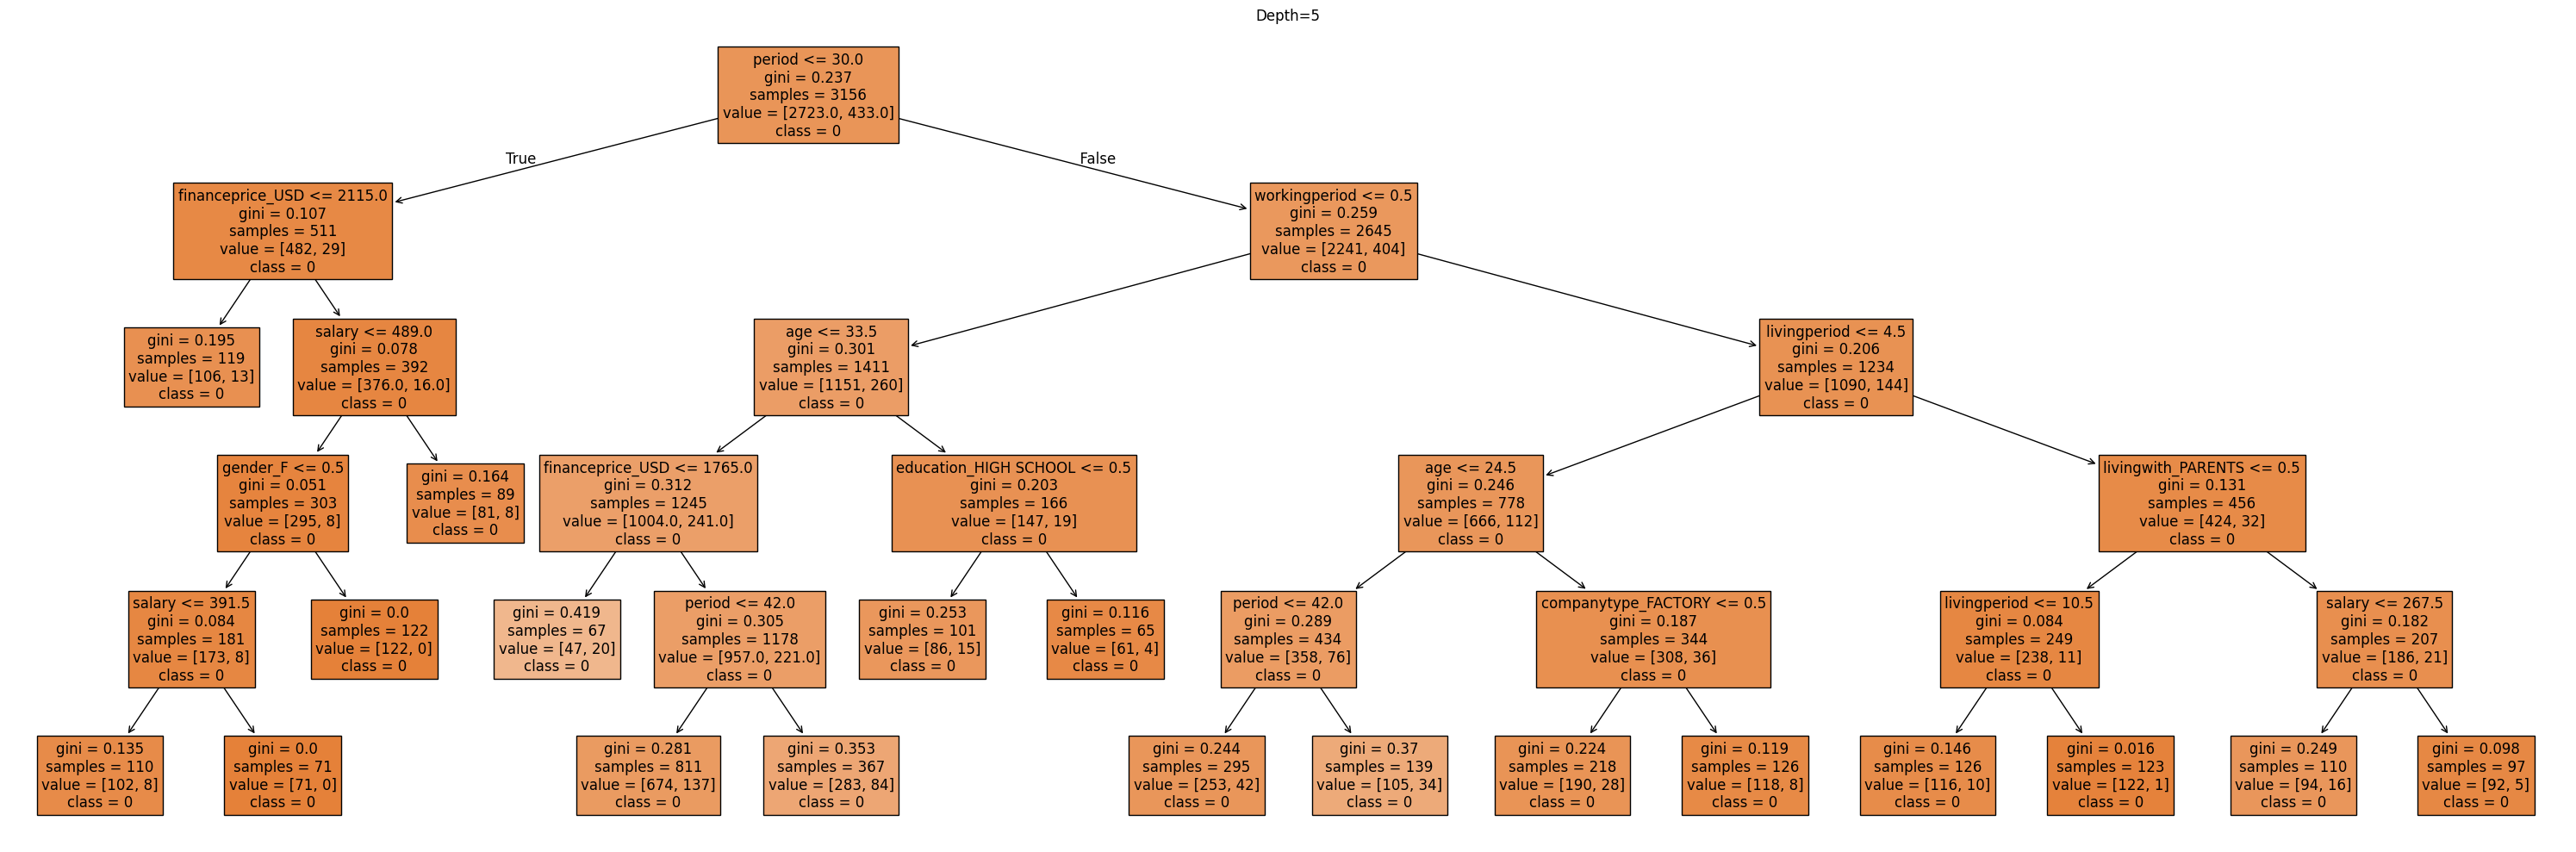

In [48]:
import pandas as pd
from sklearn.tree import _tree
from sklearn import tree

# Your existing decision tree code
depth = 5

# Prepare the data
y = 'D3_within8m'
final_df = working_df1.copy()
X = final_df.drop(columns=[y,'credit_quality_ratio','storecd']).dropna(axis=1)
y = final_df[y]

# Create dummy variables for categorical features
X = pd.get_dummies(X)

# Create and fit the decision tree
clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=0.02, random_state=11)
clf.fit(X, y)

# Export to Excel
export_tree_to_excel(clf, X, 'decision_tree_temp.xlsx')  # Removed the y argument

# Your existing visualization code
plt.figure(figsize=(30, 10))
tree.plot_tree(clf, filled=True,
              feature_names=clf.feature_names_in_,
              class_names=['0', '1'],
              fontsize=12)
plt.title('Depth=5')
plt.tight_layout()

In [84]:
final_df.merchant_cred_quality.value_counts()

merchant_cred_quality
Middle High Risk     2630
No data available     194
High Risk             116
Low Risk              114
Middle Risk           102
Name: count, dtype: int64

In [25]:
viz_model = dtreeviz.model(clf, 
                          X, y,
                          feature_names=clf.feature_names_in_.tolist(),
                          class_names=['0', '1'])

v = viz_model.view(scale=0.8)
v.show()

C:\Users\emanlangit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect wit

## Non High Risk Branches

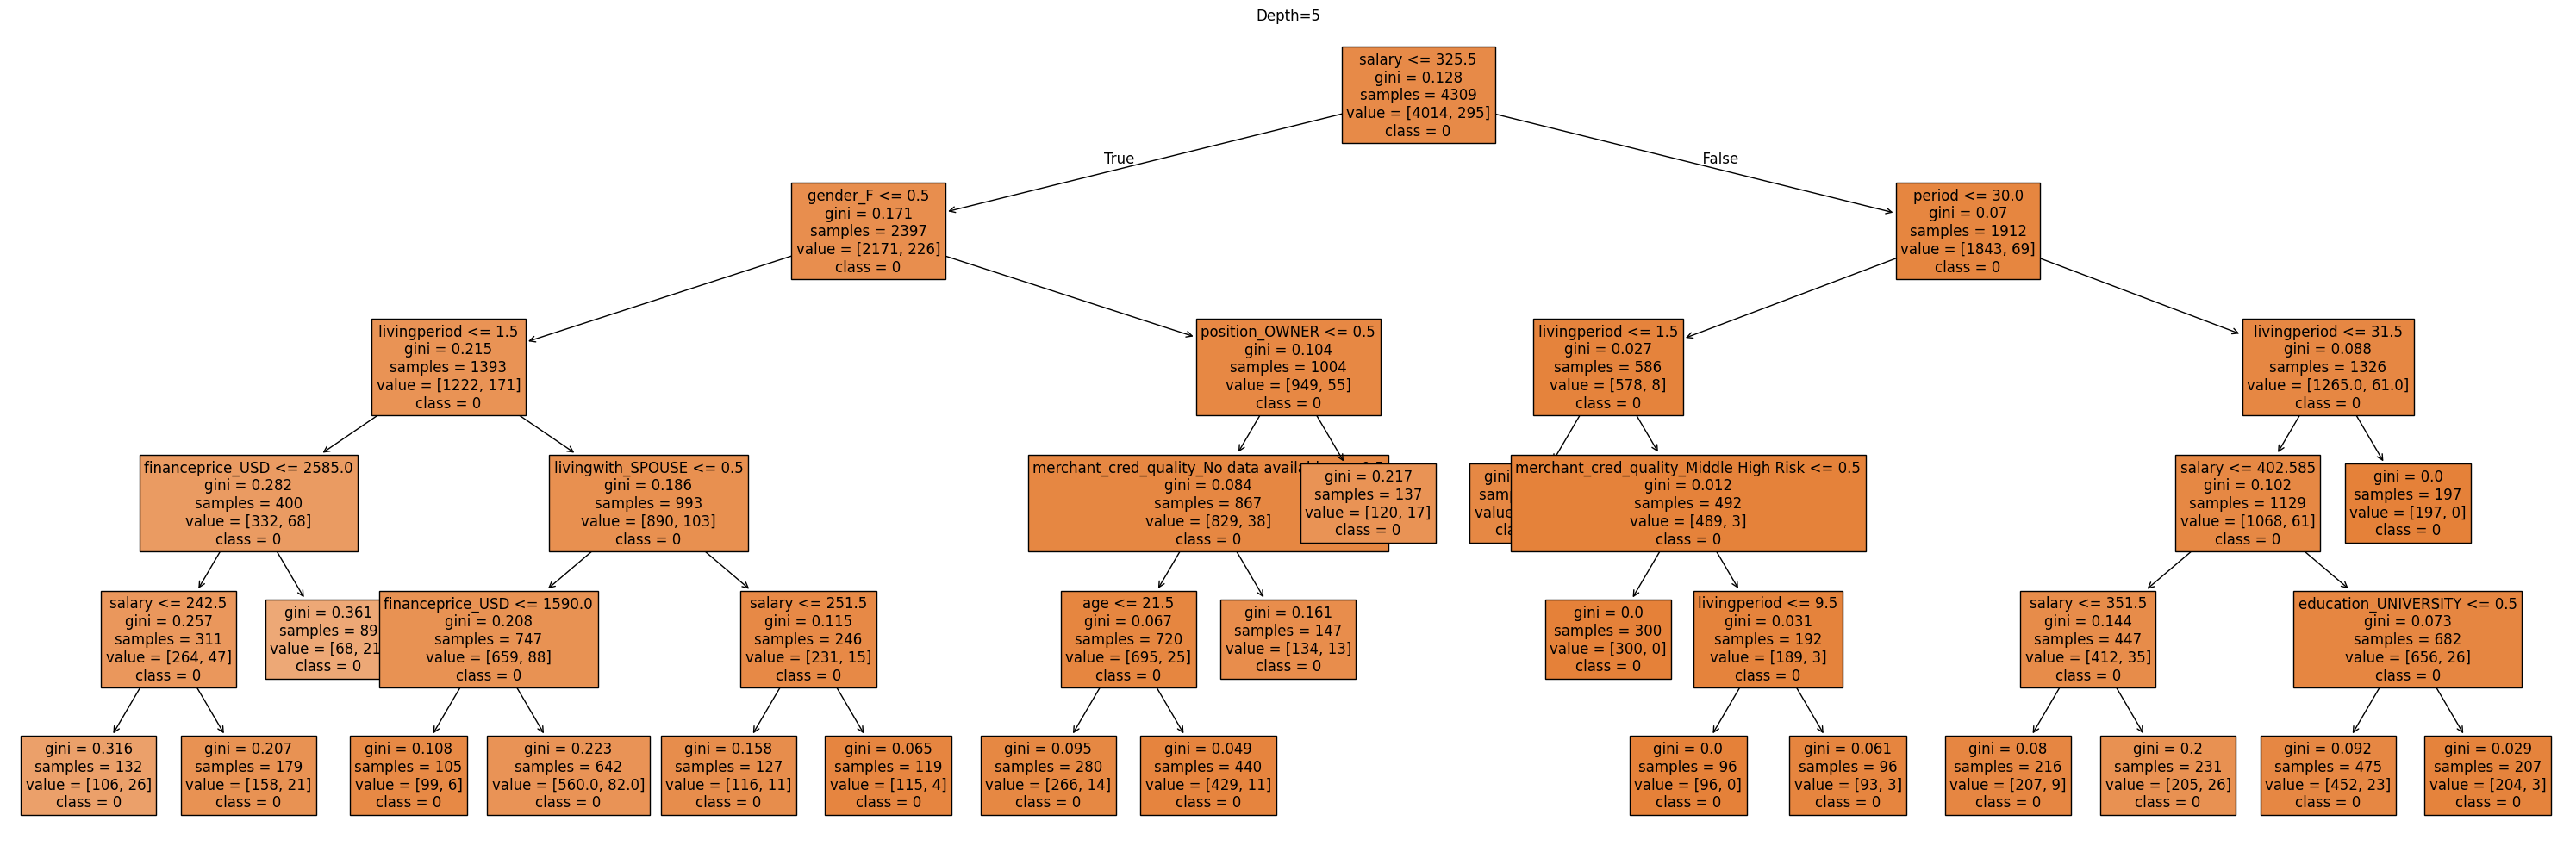

In [49]:
import pandas as pd
from sklearn.tree import _tree
from sklearn import tree

# Your existing decision tree code
depth = 5

# Prepare the data
y = 'D3_within8m'
final_df = working_df2.copy()
X = final_df.drop(columns=[y,'credit_quality_ratio','storecd']).dropna(axis=1)
y = final_df[y]

# Create dummy variables for categorical features
X = pd.get_dummies(X)

# Create and fit the decision tree
clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=0.02, random_state=11)
clf.fit(X, y)

# Export to Excel
export_tree_to_excel(clf, X, 'decision_tree_temp.xlsx')  # Removed the y argument

# Your existing visualization code
plt.figure(figsize=(30, 10))
tree.plot_tree(clf, filled=True,
              feature_names=clf.feature_names_in_,
              class_names=['0', '1'],
              fontsize=12)
plt.title('Depth=5')
plt.tight_layout()

In [50]:
viz_model = dtreeviz.model(clf, 
                          X, y,
                          feature_names=clf.feature_names_in_.tolist(),
                          class_names=['0', '1'])

v = viz_model.view(scale=0.8)
v.show()

C:\Users\emanlangit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect wit

In [41]:
X.columns

Index(['financeprice_USD', 'salary', 'period', 'livingperiod', 'workingperiod',
       'age', 'customertype_MEMBER', 'customertype_REGULAR',
       'customertype_STAFF', 'companytype_AGRICULTURE',
       'companytype_BUSINESS OWNER (COMPANY)', 'companytype_EDUCATION',
       'companytype_FACTORY', 'companytype_GOVERNMENT OFFICER',
       'companytype_LISTED COMPANY', 'companytype_NGO', 'companytype_OTHER',
       'companytype_PRIVATE COMPANY (50 STAFFS UP)',
       'companytype_PRIVATE COMPANY (LESS 50 STAFFS)',
       'companytype_SELF-EMPLOYMENT',
       'companytype_SPECIALIST (DOCTOR, LAWYER...ETC)',
       'companytype_STATE ENTERPRISE', 'typeofresident_OTHER',
       'typeofresident_OWNER', 'typeofresident_PARENTS',
       'typeofresident_RELATIVE', 'typeofresident_RENTING',
       'typeofresident_SPOUSE', 'livingwith_ALONE', 'livingwith_FRIEND',
       'livingwith_OTHER', 'livingwith_PARENTS', 'livingwith_RELATIVE',
       'livingwith_SPOUSE', 'gender_F', 'gender_M', 'maritalsta

In [42]:
final_df.merchant_cred_quality.value_counts()

merchant_cred_quality
Middle High Risk     2167
Middle Risk           724
No data available     665
Low Risk              556
High Risk             197
Name: count, dtype: int64

In [47]:
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn import tree
import xlsxwriter

def extract_tree_rules(clf, feature_names, class_names):
    """Extract decision tree rules into a DataFrame"""
    tree_rules = []
    
    def recurse(node, depth, path):
        if clf.tree_.feature[node] != -2:  # not a leaf node
            name = feature_names[clf.tree_.feature[node]]
            threshold = clf.tree_.threshold[node]
            
            # Left path (<=)
            left_path = path + [f"{name} <= {threshold:.3f}"]
            recurse(clf.tree_.children_left[node], depth + 1, left_path)
            
            # Right path (>)
            right_path = path + [f"{name} > {threshold:.3f}"]
            recurse(clf.tree_.children_right[node], depth + 1, right_path)
        else:  # leaf node
            samples = clf.tree_.n_node_samples[node]
            class_distribution = clf.tree_.value[node][0]
            majority_class = class_names[np.argmax(class_distribution)]
            
            tree_rules.append({
                'Path': ' AND '.join(path),
                'Samples': samples,
                'Class_Distribution': tuple(class_distribution),
                'Prediction': majority_class
            })
    
    recurse(0, 1, [])
    return pd.DataFrame(tree_rules)

# After fitting your decision tree model
def export_tree_to_excel(clf, X, output_file='decision_tree_results.xlsx'):
    """Export decision tree results to Excel"""
    feature_names = X.columns.tolist()
    class_names = ['0', '1']
    
    # Get tree rules
    rules_df = extract_tree_rules(clf, feature_names, class_names)
    
    # Get feature importances
    importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': clf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Create Excel writer
    with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
        # Write rules to first sheet
        rules_df.to_excel(writer, sheet_name='Tree Rules', index=False)
        
        # Write feature importances to second sheet
        importances.to_excel(writer, sheet_name='Feature Importance', index=False)
        
        # Get tree text representation
        tree_text = export_text(clf, feature_names=feature_names)
        
        # Create a sheet for text representation
        text_df = pd.DataFrame({'Tree Structure': [tree_text]})
        text_df.to_excel(writer, sheet_name='Tree Text', index=False)
        
        # Adjust column widths
        for sheet_name in writer.sheets:
            worksheet = writer.sheets[sheet_name]
            for idx, col in enumerate(rules_df.columns):
                worksheet.set_column(idx, idx, 20)

# Supporting EDA

In [91]:
eda_working_df1 = working_df1.copy()
eda_working_df2 = working_df2.copy()

In [92]:
#financeprice ok
def financeprice_bin(x):
    try:
        y = float(x)
        bins = [
            (3000, '3000 above'),
            (2700, '2701-3000'),
            (2400, '2401-2700'),
            (2100, '2101-2400'),
            (1800, '1801-2100'),
            (1500, '1501-1800'),
            (-1, '1500 below')
        ]
        
        for threshold, label in bins:
            if y > threshold:
                return label
    except ValueError:
        return x

eda_working_df1.loc[:, 'financeprice_grp'] = eda_working_df1['financeprice_USD'].apply(financeprice_bin)
eda_working_df2.loc[:, 'financeprice_grp'] = eda_working_df2['financeprice_USD'].apply(financeprice_bin)

#salary ok
def salary_bin(x):
    try:
        y = float(x)
        bins = [
            (600, '600 above'),
            (500, '501-600'),
            (400, '401-500'),
            (300, '301-400'),
            (-1, '300 below')
        ]
        
        for threshold, label in bins:
            if y > threshold:
                return label
    except ValueError:
        return x

eda_working_df1.loc[:, 'salary_grp'] = eda_working_df1['salary'].apply(salary_bin)
eda_working_df2.loc[:, 'salary_grp'] = eda_working_df2['salary'].apply(salary_bin)

#livingperiod ok
def livingperiod_bin(x):
    try:
        y = float(x)
        bins = [
            (27, '28 above'),
            (17, '18-27'),
            (7, '8-17'),
            (6, '7'),
            (5, '6'),
            (4, '5'),
            (3, '4'),
            (2, '3'),
            (1, '2'),
            (0, '1'),
            (-1, '0')
        ]
        
        for threshold, label in bins:
            if y > threshold:
                return label
    except ValueError:
        return x

eda_working_df1.loc[:, 'livingperiod_grp'] = eda_working_df1['livingperiod'].apply(livingperiod_bin)
eda_working_df2.loc[:, 'livingperiod_grp'] = eda_working_df2['livingperiod'].apply(livingperiod_bin)

#workingperiod ok
def workingperiod_bin(x):
    try:
        y = float(x)
        bins = [
            (7, '8 above'),
            (6, '7'),
            (5, '6'),
            (4, '5'),
            (3, '4'),
            (2, '3'),
            (1, '2'),
            (0, '1'),
            (-1, '0')
        ]
        
        for threshold, label in bins:
            if y > threshold:
                return label
    except ValueError:
        return x

eda_working_df1.loc[:, 'workingperiod_grp'] = eda_working_df1['workingperiod'].apply(workingperiod_bin)
eda_working_df2.loc[:, 'workingperiod_grp'] = eda_working_df2['workingperiod'].apply(workingperiod_bin)

#age 
def age_bin(x):
    try:
        y = float(x)
        bins = [
            (40, '40 above'),
            (35, '36 to 40'),
            (30, '31 to 35'),
            (25, '26 to 30'),
            (20, '21 to 25'),
            (-1, '21 below')
        ]
        
        for threshold, label in bins:
            if y > threshold:
                return label
    except ValueError:
        return x

eda_working_df1.loc[:, 'age_grp'] = eda_working_df1['age'].apply(age_bin)
eda_working_df2.loc[:, 'age_grp'] = eda_working_df2['age'].apply(age_bin)

In [93]:
# Convert the companytype column to categorical type
eda_working_df1['companytype'] = eda_working_df1['companytype'].astype('category')
# Define all possible categories
all_categories_companytype = ['PRIVATE COMPANY (LESS 50 STAFFS)', 'NGO', 'SELF-EMPLOYMENT',
       'FACTORY', 'PRIVATE COMPANY (50 STAFFS UP)', 'GOVERNMENT OFFICER',
       'STATE ENTERPRISE', 'OTHER', 'SPECIALIST (DOCTOR, LAWYER...ETC)',
       'EDUCATION', 'AGRICULTURE', 'BUSINESS OWNER (COMPANY)',
       'LISTED COMPANY']
# Set the categories
eda_working_df1['companytype'] = eda_working_df1['companytype'].cat.set_categories(all_categories_companytype)

# Convert the salary_grp column to categorical type
eda_working_df1['salary_grp'] = eda_working_df1['salary_grp'].astype('category')
# Define all possible categories
all_categories_salary_grp = ['300 below', '301-400', '401-500', '501-600','600 above']
# Set the categories
eda_working_df1['salary_grp'] = eda_working_df1['salary_grp'].cat.set_categories(all_categories_salary_grp)

# Convert the financeprice_grp column to categorical type
eda_working_df1['financeprice_grp'] = eda_working_df1['financeprice_grp'].astype('category')
# Define all possible categories
all_categories_financeprice_grp = ['1500 below', '1501-1800', '1801-2100', '2101-2400','2401-2700',
                                  '2701-3000','3000 above']
# Set the categories
eda_working_df1['financeprice_grp'] = eda_working_df1['financeprice_grp'].cat.set_categories(all_categories_financeprice_grp)

# Convert the workingperiod_grp column to categorical type
eda_working_df1['workingperiod_grp'] = eda_working_df1['workingperiod_grp'].astype('category')
# Define all possible categories
all_categories_workingperiod_grp = ['0', '1', '2', '3', '4', '5', '6','7','8 above']
# Set the categories
eda_working_df1['workingperiod_grp'] = eda_working_df1['workingperiod_grp'].cat.set_categories(all_categories_workingperiod_grp)

# Convert the livingperiod_grp column to categorical type
eda_working_df1['livingperiod_grp'] = eda_working_df1['livingperiod_grp'].astype('category')
# Define all possible categories
all_categories_livingperiod_grp = ['0', '1', '2', '3', '4', '5', '6','7','8-17','18-27','28 above']
# Set the categories
eda_working_df1['livingperiod_grp'] = eda_working_df1['livingperiod_grp'].cat.set_categories(all_categories_livingperiod_grp)

# Convert the age_grp column to categorical type
eda_working_df1['age_grp'] = eda_working_df1['age_grp'].astype('category')
# Define all possible categories
all_categories_age_grp = ['21 below', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '40 above']
# Set the categories
eda_working_df1['age_grp'] = eda_working_df1['age_grp'].cat.set_categories(all_categories_age_grp)

In [95]:

# Convert the companytype column to categorical type
eda_working_df2['companytype'] = eda_working_df2['companytype'].astype('category')
# Define all possible categories
all_categories_companytype = ['PRIVATE COMPANY (LESS 50 STAFFS)', 'NGO', 'SELF-EMPLOYMENT',
       'FACTORY', 'PRIVATE COMPANY (50 STAFFS UP)', 'GOVERNMENT OFFICER',
       'STATE ENTERPRISE', 'OTHER', 'SPECIALIST (DOCTOR, LAWYER...ETC)',
       'EDUCATION', 'AGRICULTURE', 'BUSINESS OWNER (COMPANY)',
       'LISTED COMPANY']
# Set the categories
eda_working_df2['companytype'] = eda_working_df2['companytype'].cat.set_categories(all_categories_companytype)

# Convert the salary_grp column to categorical type
eda_working_df2['salary_grp'] = eda_working_df2['salary_grp'].astype('category')
# Define all possible categories
all_categories_salary_grp = ['300 below', '301-400', '401-500', '501-600','600 above']
# Set the categories
eda_working_df2['salary_grp'] = eda_working_df2['salary_grp'].cat.set_categories(all_categories_salary_grp)

# Convert the financeprice_grp column to categorical type
eda_working_df2['financeprice_grp'] = eda_working_df2['financeprice_grp'].astype('category')
# Define all possible categories
all_categories_financeprice_grp = ['1500 below', '1501-1800', '1801-2100', '2101-2400','2401-2700',
                                  '2701-3000','3000 above']
# Set the categories
eda_working_df2['financeprice_grp'] = eda_working_df2['financeprice_grp'].cat.set_categories(all_categories_financeprice_grp)

# Convert the workingperiod_grp column to categorical type
eda_working_df2['workingperiod_grp'] = eda_working_df2['workingperiod_grp'].astype('category')
# Define all possible categories
all_categories_workingperiod_grp = ['0', '1', '2', '3', '4', '5', '6','7','8 above']
# Set the categories
eda_working_df2['workingperiod_grp'] = eda_working_df2['workingperiod_grp'].cat.set_categories(all_categories_workingperiod_grp)

# Convert the livingperiod_grp column to categorical type
eda_working_df2['livingperiod_grp'] = eda_working_df2['livingperiod_grp'].astype('category')
# Define all possible categories
all_categories_livingperiod_grp = ['0', '1', '2', '3', '4', '5', '6','7','8-17','18-27','28 above']
# Set the categories
eda_working_df2['livingperiod_grp'] = eda_working_df2['livingperiod_grp'].cat.set_categories(all_categories_livingperiod_grp)

# Convert the age_grp column to categorical type
eda_working_df2['age_grp'] = eda_working_df2['age_grp'].astype('category')
# Define all possible categories
all_categories_age_grp = ['21 below', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '40 above']
# Set the categories
eda_working_df2['age_grp'] = eda_working_df2['age_grp'].cat.set_categories(all_categories_age_grp)

## Prep DF for defaults

In [105]:
eda_working_df1_default_filter = eda_working_df1.D3_within8m == 1
eda_working_df1_default = eda_working_df1[eda_working_df1_default_filter]

eda_working_df2_default_filter = eda_working_df2.D3_within8m == 1
eda_working_df2_default = eda_working_df2[eda_working_df2_default_filter]

eda_working_df1_nondefault_filter = eda_working_df1.D3_within8m == 0
eda_working_df1_nondefault = eda_working_df1[eda_working_df1_nondefault_filter]

eda_working_df2_nondefault_filter = eda_working_df2.D3_within8m == 0
eda_working_df2_nondefault = eda_working_df2[eda_working_df2_nondefault_filter]

## Counts

In [112]:
#combine all results in one workbook
dist_categ_list = ['customertype','companytype','typeofresident',
                  'livingwith','gender','maritalstatus','education', 'position',
                  'salary_grp','financeprice_grp','livingperiod_grp','workingperiod_grp',
                  'age_grp']

def dist_categ(variable):
    t1_nondefault = eda_working_df1_nondefault[variable].value_counts().sort_index()
    t2_nondefault = eda_working_df2_nondefault[variable].value_counts().sort_index()
    t3_default = eda_working_df1_default[variable].value_counts().sort_index()
    t4_default = eda_working_df2_default[variable].value_counts().sort_index()
    
    sheetname = f'{variable}'
    mix_df = pd.DataFrame({
    'HighRiskBr Nondefault': t1_nondefault, 
    'NonHighRiskBr Nondefault': t2_nondefault,
    'HighRiskBr Default Counts': t3_default,
    'NonHighRiskBr Default': t4_default,
})
    mix_df.to_excel(writer,sheet_name=sheetname, index = True)

def num_categ(variable):
    t1_nondefault = eda_working_df1_nondefault[variable].astype(float).value_counts().sort_index()
    t2_nondefault = eda_working_df2_nondefault[variable].astype(float).value_counts().sort_index()
    t3_default = eda_working_df1_default[variable].astype(float).value_counts().sort_index()
    t4_default = eda_working_df2_default[variable].astype(float).value_counts().sort_index()
    
    sheetname = f'{variable}'
    mix_df = pd.DataFrame({
    'HighRiskBr Nondefault': t1_nondefault, 
    'NonHighRiskBr Nondefault': t2_nondefault,
    'HighRiskBr Default Counts': t3_default,
    'NonHighRiskBr Default': t4_default,
})
    mix_df.to_excel(writer,sheet_name=sheetname, index = True)
    
with pd.ExcelWriter('Supporting_EDA_MHP_2024_HRB_NHRBTemp.xlsx', engine='openpyxl') as writer:
    for i in range (0,len(dist_categ_list)):
        dist_categ(dist_categ_list[i])
    num_categ('period')
    num_categ('interrate')